# **Lista de Exercícios 02 - Processamento Digital de Imagens**

#### **Alunos:** Elias Faria Silva (2018127254), Giovanni Martins de Sá Júnior (2017001850)

Nesta segunda lista de exercícios, assim como na primeira, serão executadas algumas técnicas de processamento sobre uma imagem em escala de cinza, focando em fazer análises do realce obtidas pela imagem. Nesse sentido, serão discutidas as implementações feitas de uma forma mais direta.

**Observação:** Nesta segunda lista de Exercícios, também foram utilizadas duas bibliotecas para duas funções distintas. Dentro biblioteca **Image**, foi utilizado alguns recursos do módulo **PIL**, que permitiu a execução de algumas tarefas, como a importação das imagens e reajuste da resolução das imagens, mas também a obtenção/atribuição dos/aos valores armezanados nos pixels das imagens, dentro das funções desenvolvidas, tal como foi executado no **Exercício Zero**. Essas duas manipulações são vistas com os parâmetros **getpixel** e **putpixel**.

## Importação da Base de Imagens utilizada

In [53]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

#### Imagem 01 (Mais rica em detalhes)

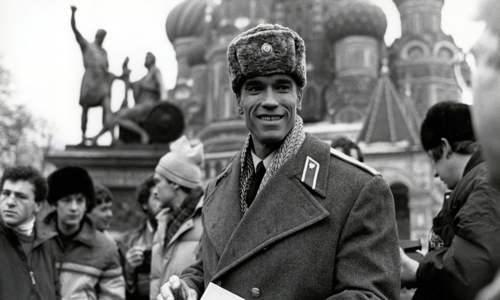

In [6]:
caminho_da_imagem_1 = 'C:\Projetos\Trabalhos-Faculdade\Processamento Digital de Imagens\Listas\Lista 2/arnold.jpg'
imagem_1 = Image.open(caminho_da_imagem_1)
imagem_1 = imagem_1.resize((500, 300))
display(imagem_1)

#### Imagem 02 (Mais abstrata, com formas geométricas)

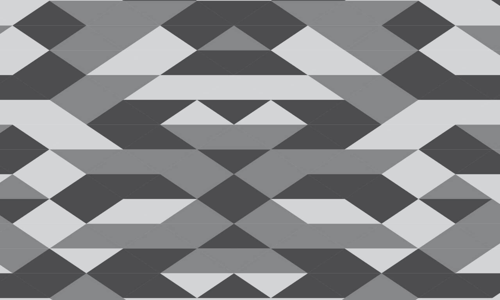

In [49]:
caminho_da_imagem_2 = 'C:\Projetos\Trabalhos-Faculdade\Processamento Digital de Imagens\Listas\Lista 2/geometric.jpg'
imagem_2 = Image.open(caminho_da_imagem_2)
imagem_2 = imagem_2.resize((500, 300))
display(imagem_2)

## QUESTÃO 7 - Histograma (Erros na Implementação)

In [59]:
def calcular_histograma(imagem):
    largura, altura = imagem.size
    histograma = [0] * 256

    for i in range(altura):
        for j in range(largura):
            pixel = imagem.getpixel((j, i))
            # Converte a cor para tons de cinza (escala de luminosidade)
            pixel_cinza = int(0.299 * pixel[0] + 0.587 * pixel[1] + 0.114 * pixel[2])
            histograma[pixel_cinza] += 1

    return histograma

def equalizar_histograma(imagem):
    largura, altura = imagem.size
    total_pixels = largura * altura

    # Calcula o histograma acumulado
    histograma_acumulado = [sum(calcular_histograma(imagem)[:i+1]) for i in range(256)]

    # Calcula a transformação de equalização
    equalizacao = [int(((histograma_acumulado[pixel] - 1) / total_pixels) * 255) for pixel in range(256)]

    # Garante que o LUT tenha 256 entradas
    equalizacao.extend([0] * (256 - len(equalizacao)))

    # Aplica a equalização na imagem
    imagem_equalizada = imagem.point(equalizacao)

    return imagem_equalizada
    
def exibir_histograma(histograma, titulo):
    plt.bar(range(256), histograma, color='gray', width=1)
    plt.title(titulo)
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.show()

def exibir_comparacao(imagem_original, histograma_original, imagem_equalizada, histograma_equalizado):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(imagem_original)
    plt.title('Imagem Original')

    plt.subplot(2, 2, 2)
    exibir_histograma(histograma_original, 'Histograma Original')

    plt.subplot(2, 2, 3)
    plt.imshow(imagem_equalizada)
    plt.title('Imagem Equalizada')

    plt.subplot(2, 2, 4)
    exibir_histograma(histograma_equalizado, 'Histograma Equalizado')

    plt.tight_layout()
    plt.show()

In [60]:
# Imagem 01
histograma_original_1 = calcular_histograma(imagem_1)
imagem_equalizada_1 = equalizar_histograma(imagem_1)
histograma_equalizado_1 = calcular_histograma(imagem_equalizada_1)
exibir_comparacao(imagem_1, histograma_original_1, imagem_equalizada_1, histograma_equalizado_1)

# Imagem 02
histograma_original_2 = calcular_histograma(imagem_2)
imagem_equalizada_2 = equalizar_histograma(imagem_2)
histograma_equalizado_2 = calcular_histograma(imagem_equalizada_2)
exibir_comparacao(imagem_2, histograma_original_2, imagem_equalizada_2, histograma_equalizado_2)

ValueError: wrong number of lut entries

## QUESTÃO 8A - Filtro de Suavização - Imagem 01

O filtro de suavização utilizado nesta questão, foi o **Filtro Gaussiano**, responsável por reduzir o ruído e detalhes de alta frequência em uma imagem, gerando um **efeito de desfoque**. Para isso, ele utiliza uma máscara gaussiana para efetuar a operação de convolução com os pixels da imagem, como pode ser visto no resultado obtido, em que a imagem realça pessoa em destaque, desfocando levemente o ambiente ao redor.

In [9]:
def aplicar_filtro_gaussiano(imagem_original):
    largura, altura = imagem_original.size
    imagem_suavizada = Image.new("RGB", (largura, altura))

    mascara_gaussiana = [
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]

    for i in range(1, altura - 1):
        for j in range(1, largura - 1):
            soma_r, soma_g, soma_b = 0, 0, 0
            for k in range(3):
                for l in range(3):
                    pixel = imagem_original.getpixel((j - 1 + l, i - 1 + k))
                    soma_r += pixel[0] * mascara_gaussiana[k][l]
                    soma_g += pixel[1] * mascara_gaussiana[k][l]
                    soma_b += pixel[2] * mascara_gaussiana[k][l]

            pixel_suavizado = (
                int(soma_r / 16),
                int(soma_g / 16),
                int(soma_b / 16)
            )

            imagem_suavizada.putpixel((j, i), pixel_suavizado)

    return imagem_suavizada

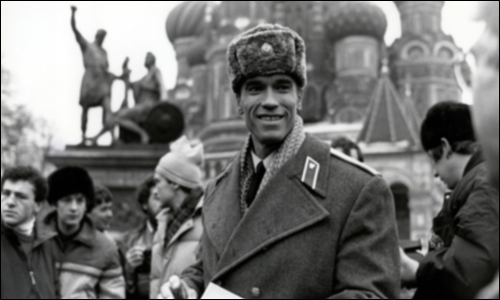

In [11]:
# Aplica o filtro gaussiano e exibicao da imagem
imagem_suavizada_1 = aplicar_filtro_gaussiano(imagem_1)
display(imagem_suavizada_1)

## QUESTÃO 8B - Filtro de Suavização - Imagem 02

Nesta segunda atividade, foi utilizado um filtro de suavização, sendo ele o **filtro de média**, geralmente utilizado para a redução de ruído e detalhes finos em uma imagem. Nesse sentido, o tamanho da máscara adota influenciará diretamente na intensidade da suavição aplicada sobre a imagem, como pode ser vista nos resultados da **Imagem 02**. Como pode ser visto, a aplicação da máscara de dimensão 5 trouxe uma maior suavização que a máscara de dimensão 3, de forma que a imagem parecesse até um pouco mais desfocada.

In [44]:
def aplicar_filtro_suavizacao(imagem_original, tamanho_mascara):
    largura, altura = imagem_original.size
    imagem_suavizada = Image.new("L", (largura, altura))

    # Converte a imagem para tons de cinza
    imagem_original = imagem_original.convert("L")

    # Define as máscaras de suavização para dois tamanhos diferentes
    if tamanho_mascara == 3:
        mascara_suavizacao = [
            [1, 1, 1],
            [1, 1, 1],
            [1, 1, 1]
        ]
    elif tamanho_mascara == 5:
        mascara_suavizacao = [
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1]
        ]

    # Aplica o filtro de suavização
    for i in range(tamanho_mascara // 2, altura - tamanho_mascara // 2):
        for j in range(tamanho_mascara // 2, largura - tamanho_mascara // 2):
            soma = 0
            for k in range(tamanho_mascara):
                for l in range(tamanho_mascara):
                    pixel = imagem_original.getpixel((j - tamanho_mascara // 2 + l, i - tamanho_mascara // 2 + k))
                    soma += pixel * mascara_suavizacao[k][l]
            pixel_suavizado = int(soma / (tamanho_mascara ** 2))
            imagem_suavizada.putpixel((j, i), pixel_suavizado)

    return imagem_suavizada

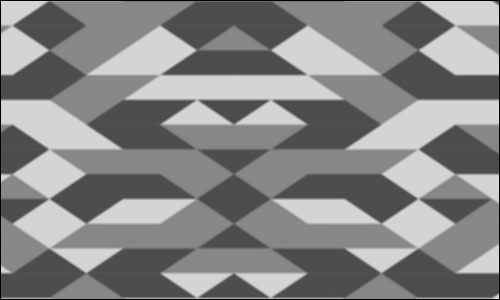

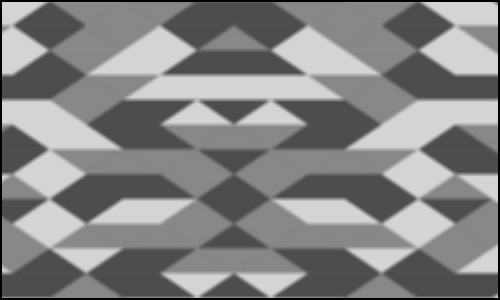

In [50]:
# Aplica o filtro de suavização para uma máscara de tamanho 3 e 5
imagem_suavizada_3 = aplicar_filtro_suavizacao(imagem_2, 3)
imagem_suavizada_5 = aplicar_filtro_suavizacao(imagem_2, 5)

display(imagem_suavizada_3)
display(imagem_suavizada_5)

## QUESTÃO 8C - Laplaciano - Imagem 01

O filtro Laplaciana utiliza uma técnica de processamente que realça regiões onde ocorrem mudanças abruptas de intensidade, como as bordas e contornos, convoluindo a imagem com um kernel Laplaciano. Assim, as mudanças de intensidade,geralmente localizadas nas bordas, ficam realçadas após a aplicação da técnica. Com isso, percebe-se que tanto na Imagem 01, quanto na Imagem 02, o resultado obtido foi interessante. Na primeira imagem, os realces evidenciaram a pessoa em destaque, como também outras presentes mais no fundo, enquanto na segunda, os contornos geométricos ganharam o destaque.

In [46]:
def aplicar_filtro_laplaciano(imagem_original):
    largura, altura = imagem_original.size
    imagem_laplaciano = Image.new("L", (largura, altura))

    mascara_laplaciano = [
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ]

    for i in range(1, altura - 1):
        for j in range(1, largura - 1):
            soma = 0
            for k in range(3):
                for l in range(3):
                    pixel = imagem_original.getpixel((j - 1 + l, i - 1 + k))
                    soma += pixel[0] * mascara_laplaciano[k][l]
            pixel_laplaciano = int(abs(soma))
            imagem_laplaciano.putpixel((j, i), pixel_laplaciano)

    return imagem_laplaciano

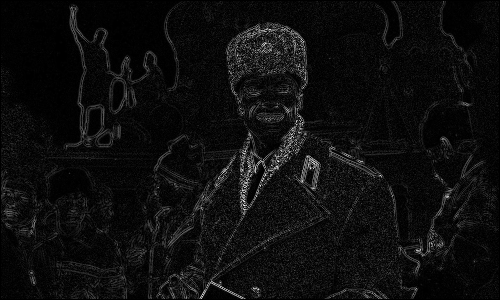

In [18]:
# Aplica o filtro Laplaciano na Imagem 1
imagem_laplaciano_1 = aplicar_filtro_laplaciano(imagem_1)
display(imagem_laplaciano_1)

## QUESTÃO 8D - Laplaciano - Imagem 02

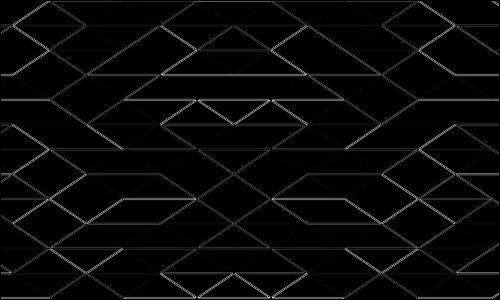

In [51]:
imagem_laplaciano_2 = aplicar_filtro_laplaciano(imagem_2)
display(imagem_laplaciano_2)

## QUESTÃO 8E - Filtro da Mediana - Imagem 01

O filtro da mediana é um tipo de filtro de suaviazação que executa a mediana dos valores dos pixels em uma vizinhança para o cálculo do valor no pixel central. Com isso, ele se torna particularmente útil na remoção de ruídos de impulso, como o **sal e pimenta**, preservando detalhes de borda, comparado com o filtro de média. Com isso, quanto maior o tamanho da máscara utilizada no problema, maior a vizinhança utilizada para execução do cálculo.

A respeito dos resultados obtidos, para a Imagem 01, o resultado trouxe um desfoque maior para a imagem, enquanto na Imagem 02, o resultado não se mostrou tão interessante.

In [38]:
def aplicar_filtro_mediana(imagem_original, tamanho_mascara):
    largura, altura = imagem_original.size
    imagem_suavizada = Image.new("L", (largura, altura))

    for i in range(1, altura - 1):
        for j in range(1, largura - 1):
            vizinhos = []
            for k in range(tamanho_mascara):
                for l in range(tamanho_mascara):
                    x = j - 1 + l
                    y = i - 1 + k
                    
                    # Verifica se o pixel está dentro dos limites da imagem
                    if 0 <= x < largura and 0 <= y < altura:
                        pixel = imagem_original.getpixel((x, y))
                        vizinhos.append(pixel[0])

            vizinhos.sort()
            mediana = vizinhos[len(vizinhos) // 2]
            imagem_suavizada.putpixel((j, i), mediana)

    return imagem_suavizada

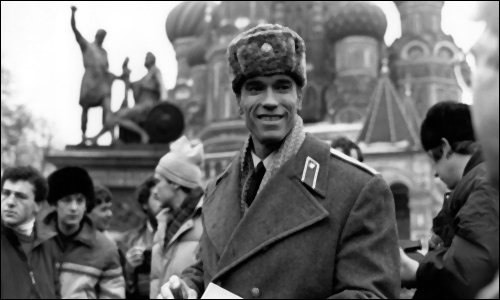

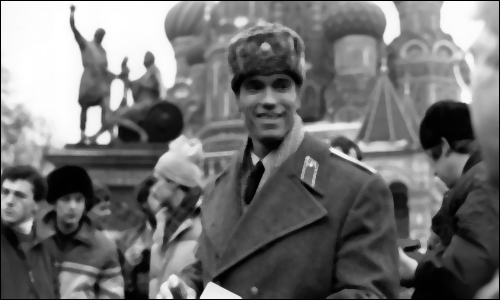

In [26]:
# Aplica o filtro de mediana para uma máscara de tamanho 3 e 5
imagem_suavizada_3_1 = aplicar_filtro_mediana(imagem_1, 3)
imagem_suavizada_5_1 = aplicar_filtro_mediana(imagem_1, 5)

display(imagem_suavizada_3_1)
display(imagem_suavizada_5_1)

## QUESTÃO 8F - Filtro da Mediana - Imagem 02

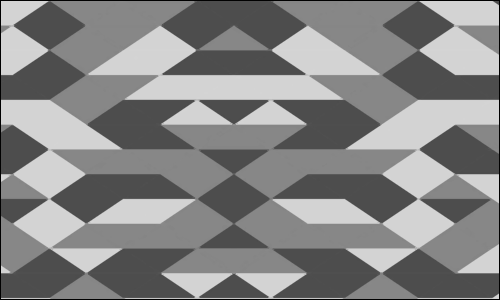

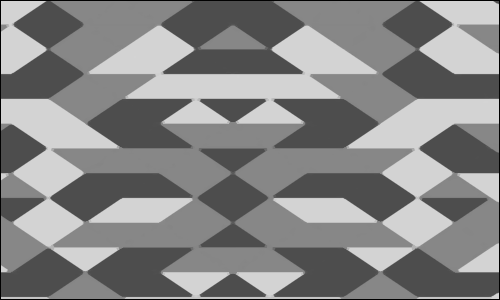

In [39]:
# Aplica o filtro de mediana para uma máscara de tamanho 3 e 5
imagem_suavizada_3_2 = aplicar_filtro_mediana(imagem_2, 3)
imagem_suavizada_5_2 = aplicar_filtro_mediana(imagem_2, 5)

display(imagem_suavizada_3_2)
display(imagem_suavizada_5_2)

## QUESTÃO 8G - Filtro de Máximo - Imagem 01

O filtro de máximo é um tipo de filtro que realça as regiões com maior intensidade, comparadas com a vizinhança local. Assim, ele opera tomando o valor máximo entre os pixels da vizinhança e atribuindo esse valor ao pixel central. Com isso, a variação do tamanho da máscara provocar um aumento de intensidade de uma região frente a sua vizinhança.

Acerca das imagens, na **Imagem 01**, a aplicação do Filtro teve um resultado muito interessante, realçando com grande destaque as regiões de grande intensidade, como o fundo e detalhes do terno da pessoa em destaque. Na **Imagem 02**, por não haver regiões com uma difença de intensidade tão grandes, o resultado obtido particularmente não foi tão intessante quando na Imagem 01.

In [40]:
def aplicar_filtro_maximo(imagem_original, tamanho_mascara):
    largura, altura = imagem_original.size
    imagem_suavizada = Image.new("L", (largura, altura))

    for i in range(1, altura - 1):
        for j in range(1, largura - 1):
            valores_vizinhos = []
            for k in range(tamanho_mascara):
                for l in range(tamanho_mascara):
                    x = j - 1 + l
                    y = i - 1 + k
                    
                    # Verifica se o pixel está dentro dos limites da imagem
                    if 0 <= x < largura and 0 <= y < altura:
                        pixel = imagem_original.getpixel((x, y))
                        valores_vizinhos.append(pixel[0])

            valor_maximo = max(valores_vizinhos)
            imagem_suavizada.putpixel((j, i), valor_maximo)

    return imagem_suavizada

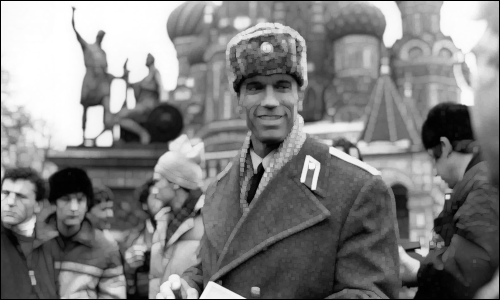

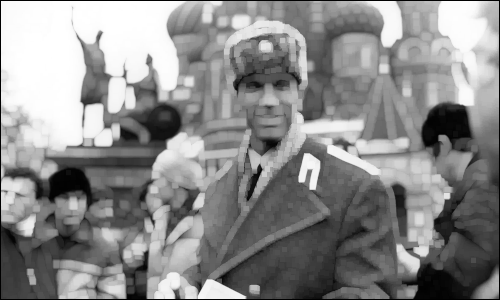

In [31]:
# Aplica o filtro de máximo para uma máscara de tamanho 3 e 5
imagem_maximo_3_1 = aplicar_filtro_maximo(imagem_1, 3)
imagem_maximo_5_1 = aplicar_filtro_maximo(imagem_1, 5)

display(imagem_maximo_3_1)
display(imagem_maximo_5_1)

## QUESTÃO 8H - Filtro de Máximo - Imagem 02

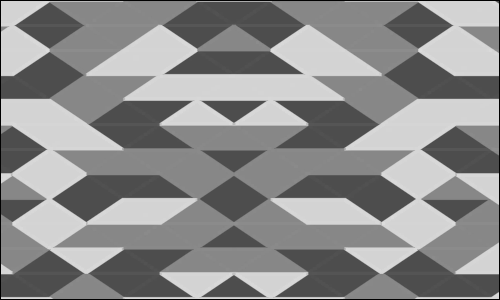

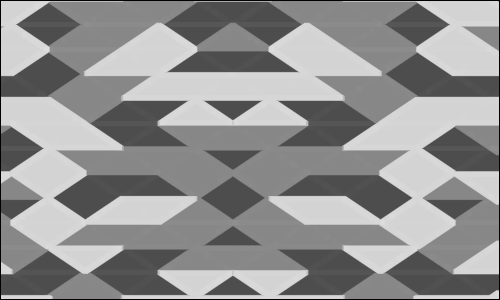

In [41]:
# Aplica o filtro de máximo para uma máscara de tamanho 3 e 5
imagem_maximo_3_2 = aplicar_filtro_maximo(imagem_2, 3)
imagem_maximo_5_2 = aplicar_filtro_maximo(imagem_2, 5)

display(imagem_maximo_3_2)
display(imagem_maximo_5_2)